In [3]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import random
import matplotlib.pyplot as plt
import numpy as np

Selecting Rose and Sunflower

In [4]:
base_dir = "/content/drive/MyDrive/flowers"
selected_classes = ['sunflower', 'rose']

# To store Selected class..
temp_dir = '/content/drive/MyDrive/flowers_temp'
os.makedirs(temp_dir, exist_ok=True)

for class_name in selected_classes:
    class_dir = os.path.join(base_dir, class_name)
    temp_class_dir = os.path.join(temp_dir, class_name)
    if not os.path.exists(temp_class_dir):
        shutil.copytree(class_dir, temp_class_dir)

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [6]:
train_generator = datagen.flow_from_directory(
    temp_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

Found 1223 images belonging to 2 classes.


In [7]:
validation_generator = datagen.flow_from_directory(
    temp_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 304 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
39/39 [==============================] - 23s 573ms/step - loss: 0.3996 - accuracy: 0.7989 - val_loss: 0.3887 - val_accuracy: 0.8355
Epoch 2/10
39/39 [==============================] - 21s 489ms/step - loss: 0.3077 - accuracy: 0.8782 - val_loss: 0.3594 - val_accuracy: 0.8816
Epoch 3/10
39/39 [==============================] - 16s 405ms/step - loss: 0.2424 - accuracy: 0.9019 - val_loss: 0.3179 - val_accuracy: 0.8618
Epoch 4/10
39/39 [==============================] - 16s 405ms/step - loss: 0.2170 - accuracy: 0.9182 - val_loss: 0.3150 - val_accuracy: 0.8882
Epoch 5/10
39/39 [==============================] - 17s 430ms/step - loss: 0.1958 - accuracy: 0.9264 - val_loss: 0.3641 - val_accuracy: 0.8520
Epoch 6/10
39/39 [==============================] - 28s 711ms/step - loss: 0.2004 - accuracy: 0.9133 - val_loss: 0.3203 - val_accuracy: 0.8882
Epoch 7/10
39/39 [==============================] - 16s 390ms/step - loss: 0.1502 - accuracy: 0.9395 - val_loss: 0.3007 - val_accuracy: 0.8914

In [10]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print("Test Accuracy:", test_accuracy)
print("Test Loss:", test_loss)

10/10 [==============================] - 3s 246ms/step - loss: 0.3582 - accuracy: 0.8914
Test Accuracy: 0.8914473652839661
Test Loss: 0.35821759700775146


In [11]:
def predict_random_image(model, generator):
    random_index = random.randint(0, len(generator) - 1)
    img_array, _ = generator[random_index]
    img_array = img_array[random.randint(0, len(img_array) - 1)]
    img = image.array_to_img(img_array)
    prediction = model.predict(np.expand_dims(img_array, axis=0))
    if prediction[0][0] > 0.5:
        print("Predicted: Sunflower")
    else:
        print("Predicted: Rose")
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 200ms/step
Predicted: Sunflower


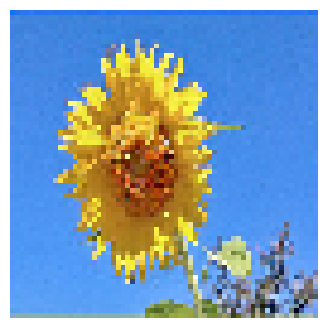

In [12]:
predict_random_image(model, validation_generator)

1/1 [==============================] - 0s 46ms/step
Predicted: Rose


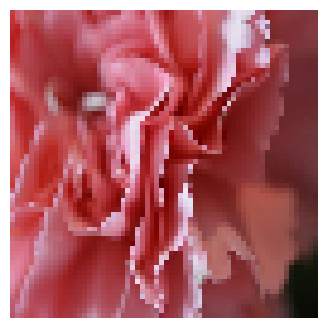

In [13]:
predict_random_image(model, validation_generator)

1/1 [==============================] - 0s 73ms/step
Predicted: Rose


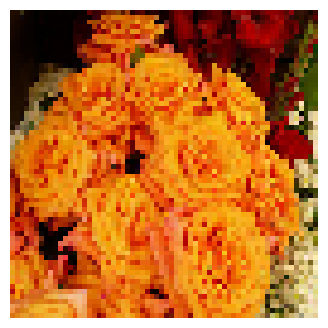

In [14]:
predict_random_image(model, validation_generator)

1/1 [==============================] - 0s 42ms/step
Predicted: Sunflower


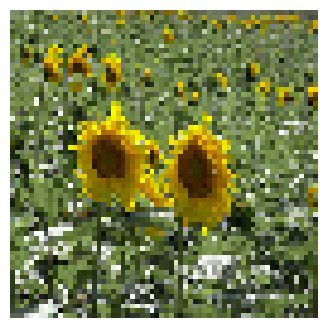

In [15]:
predict_random_image(model, validation_generator)